In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [7]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<AxesSubplot:xlabel='month'>

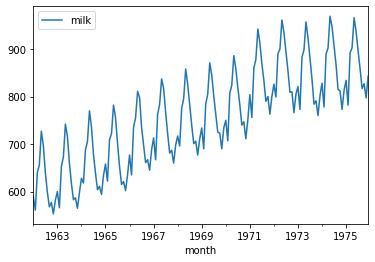

In [4]:
milk.plot()

In [8]:
sm.tsa.stattools.adfuller(milk.milk)

(-1.3038115874221277,
 0.6274267086030325,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [9]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221277,
 0.6274267086030325,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [14]:
milk['ave'] = milk.milk / milk.index.days_in_month

<AxesSubplot:xlabel='month'>

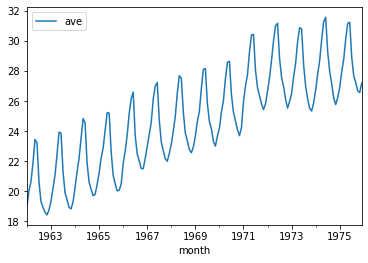

In [20]:
milk.drop('milk', axis=1).plot()

In [23]:
milk.ave.sum()

4166.326661899466

In [24]:
milk

,milk,ave
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


In [27]:
sm.tsa.stattools.adfuller(milk.ave)

(-1.1798216373266006,
 0.6822151513081454,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.5708067458066353)

In [30]:
milk['ave_diff1'] = milk.ave - milk.ave.shift(1)

In [38]:
milk.iloc[1:, :]

,milk,ave,ave_diff1
month,,,
1962-02-01,561,20.035714,1.035714
1962-03-01,640,20.645161,0.609447
1962-04-01,656,21.866667,1.221505
1962-05-01,727,23.451613,1.584946
1962-06-01,697,23.233333,-0.218280
...,...,...,...
1975-08-01,858,27.677419,-1.225806
1975-09-01,817,27.233333,-0.444086
1975-10-01,827,26.677419,-0.555914


<AxesSubplot:xlabel='month'>

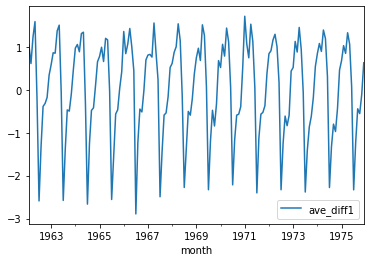

In [51]:
milk.iloc[1:, [-1]].plot()

In [55]:
sm.tsa.stattools.adfuller(milk.iloc[1:, [-1]])

(-2.7594694762288947,
 0.06430054654174941,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [56]:
milk['ave_diffse'] = milk.ave - milk.ave.shift(12)

In [57]:
milk.iloc[1:, [-1]]

,ave_diffse
month,
1962-02-01,NaN
1962-03-01,NaN
1962-04-01,NaN
1962-05-01,NaN
1962-06-01,NaN
...,...
1975-08-01,-0.290323
1975-09-01,0.066667
1975-10-01,0.483871


<AxesSubplot:xlabel='month'>

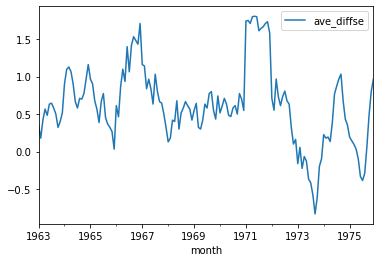

In [61]:
milk.dropna().iloc[:, [-1]].plot()

In [62]:
sm.tsa.stattools.adfuller(milk.dropna().iloc[:, [-1]])

(-2.1594860932888085,
 0.22127672658830344,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [66]:
milk['ave_diffse+1'] = milk.ave_diffse - milk.ave_diffse.shift(1)

<AxesSubplot:xlabel='month'>

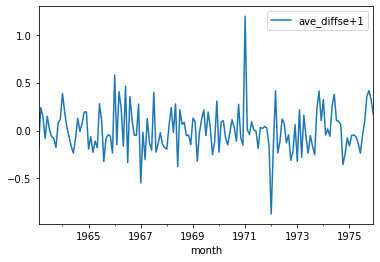

In [67]:
milk.dropna().iloc[:, [-1]].plot()

In [68]:
milk.dropna().iloc[:, [-1]]

,ave_diffse+1
month,
1963-02-01,-0.176267
1963-03-01,0.240783
1963-04-01,0.147312
1963-05-01,-0.082796
1963-06-01,0.149462
...,...
1975-08-01,0.096774
1975-09-01,0.356989
1975-10-01,0.417204


In [69]:
sm.tsa.stattools.adfuller(milk.dropna().iloc[:, [-1]])

(-5.481326334796929,
 2.2808455518037136e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

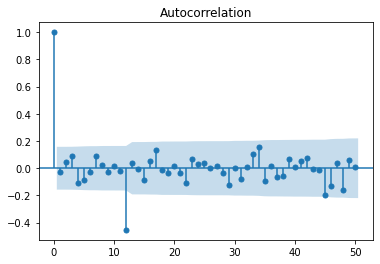

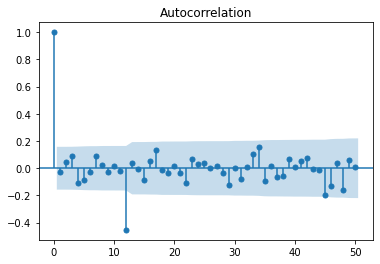

In [75]:
sm.graphics.tsa.plot_acf(milk.dropna().iloc[:, [-1]].values.squeeze(), lags=50)

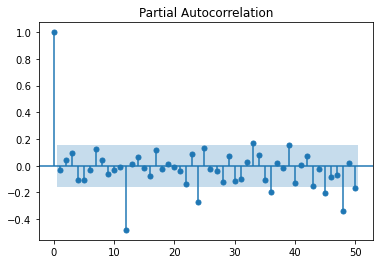

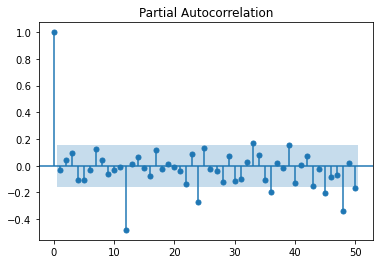

In [76]:
sm.graphics.tsa.plot_pacf(milk.dropna().iloc[:, [-1]].values.squeeze(), lags=50)

In [3]:
(999999999*9)**(-8)

2.323057331126336e-80

In [ ]:
! jupyter notebook --debug

[D 04:29:33.578 NotebookApp] Searching ['/Users/admin/Documents/learnpython/coursera', '/Users/admin/.jupyter', '/Users/admin/anaconda3/envs/data/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter'] for config files
[D 04:29:33.579 NotebookApp] Looking for jupyter_config in /etc/jupyter
[D 04:29:33.579 NotebookApp] Looking for jupyter_config in /usr/local/etc/jupyter
[D 04:29:33.579 NotebookApp] Looking for jupyter_config in /Users/admin/anaconda3/envs/data/etc/jupyter
[D 04:29:33.579 NotebookApp] Looking for jupyter_config in /Users/admin/.jupyter
[D 04:29:33.579 NotebookApp] Looking for jupyter_config in /Users/admin/Documents/learnpython/coursera
[D 04:29:33.579 NotebookApp] Looking for jupyter_notebook_config in /etc/jupyter
[D 04:29:33.579 NotebookApp] Looking for jupyter_notebook_config in /usr/local/etc/jupyter
[D 04:29:33.579 NotebookApp] Looking for jupyter_notebook_config in /Users/admin/anaconda3/envs/data/etc/jupyter
[D 04:29:33.580 NotebookApp] Loaded config file: /User